In [1]:
## Project : US Murder Rate and Capital Punishment
#### Author  : Sobha

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#%matplotlib inline

os.chdir(r"provide\the\path")
os.chdir(r"provide\the\path")
data = pd.read_csv("crime_rates.csv")
data.head()

###Question 1.1.### 
    #Mentioned in report

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.300003,10.2,20.799999,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003
1,Alaska,1961,234000,88.900002,11.5,13.200000,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003
2,Alaska,1962,246000,91.500000,4.5,18.700001,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006
3,Alaska,1963,248000,109.699997,6.5,14.900000,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012
4,Alaska,1964,250000,150.000000,10.4,22.400000,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000



        Murder Rates in respective states


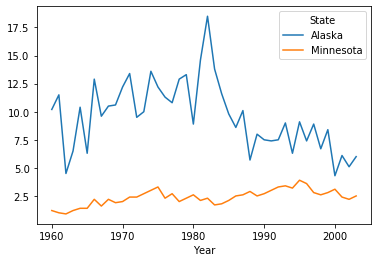

In [2]:
###Question 1.2.### 
    #Draw a line plot with years on the horizontal axis and murder rates on the vertical axis. Include two lines: one for 
    #Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call: ak_mn.plot(’Year’).

ak_mn = data[['State','Year','Murder Rate']]
ak_mn = ak_mn[ak_mn['State'].isin(['Alaska','Minnesota'])]
print("\n        Murder Rates in respective states") 
ak_mn.pivot(index='Year',columns='State',values='Murder Rate').plot()


       5 States that had the highest murder rate in the year 2000


array(['Louisiana', 'Mississippi', 'Maryland', 'Georgia', 'New Mexico'],
      dtype=object)

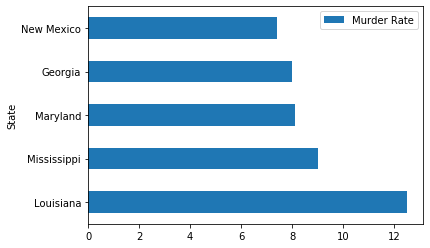

In [3]:
###Question 1.3###
    #mplement the function most_murderous, which takes a year (an integer) as its argument. It does two things:
    #1. It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.
    #2. It returns an array of the names of these states in order of increasing murder rate.
    
def most_murderous(year):
    most = data[data['Year']==year][['State','Murder Rate']]
    most = most.groupby('State').agg('mean').reset_index().sort_values(['Murder Rate'],ascending=False)[:5]
    print("\n       5 States that had the highest murder rate in the year", year) 
    most.plot(kind='barh',y='Murder Rate',x='State')
    return most['State'].values 
    print('States in order of increasing murder rate in the year',year,'=', most['State'].values)

most_murderous(2000)

In [4]:
###Question 1.4.### 
    #How many more people were murdered in California in 1988 than in 1975? Assign ca_change to the answer.

data['Murder Count'] = (data['Murder Rate']*data['Population'])/100000
ca_chg = data.loc[data['State']=='California',['Year','Murder Count']]
ca_change = np.round(ca_chg[ca_chg['Year'].isin([1988,1975])]['Murder Count'].diff().values[1])
print('How many more people were murdered in California in 1988 than in 1975 (ca_change) =',ca_change)

How many more people were murdered in California in 1988 than in 1975 (ca_change) = 726.0


In [5]:
###Question 2.1.###
    #Implement the function two_year_changes that takes an array of murder rates for a state, ordered by increasing year. 
    #For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number 
    #of decreases.

def two_year_change(state):
    sub_data = data[data['State']==state][['State','Year','Murder Rate']]
    sub_data['diff'] = sub_data[['Murder Rate']].diff(2)
    change = np.count_nonzero(sub_data['diff']>0)-np.count_nonzero(sub_data['diff']<0)
    return pd.DataFrame([{'State':state,'Murder Rate two_year_changes':change}])

print(two_year_change('Alaska'))
print(two_year_change('Minnesota'))

    State  Murder Rate two_year_changes
0  Alaska                            -5
       State  Murder Rate two_year_changes
0  Minnesota                             6


        State  Murder Rate two_year_changes
1     Alabama                            -6
0      Alaska                            -5
3     Arizona                             1
2    Arkansas                            -1
4  California                            17


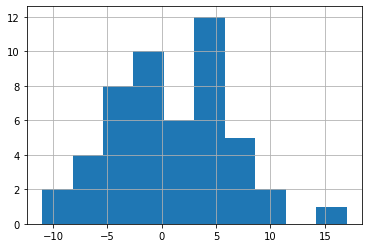

In [6]:

###Question 2.2.### 
    #Assign changes by state to a table with one row per state that has two columns: the State name and the Murder Rate 
    #two year changes statistic computed across all years in our data set for that state.
plt.figure()
df = pd.DataFrame()
for i in data['State'].unique():
    df = pd.concat([df,two_year_change(i)])
df = df.reset_index(drop=True)
df = df.sort_values(by=['State'])
print(df.head())

df['Murder Rate two_year_changes'].hist()


In [7]:

###Question 2.3.### 
    #Assign total changes to the total increases minus the total decreases for all two-year periods and all states 
    #in our data set.

total_changes = df['Murder Rate two_year_changes'].sum()
print('Total increases minus total decreases, across all states and years:', total_changes)


Total increases minus total decreases, across all states and years: 45


In [8]:

###Question 2.4.###
    #Set num changes to the number of diﬀerent two-year periods in the entire data set that could result in a change of 
    #a state’s murder rate. Include both those periods where a change occurred and the periods where a state’s rate 
    #happened to stay the same.
#states_count=data['State'].nunique()
#print('count of unique states',states_count)
period = 0
for i in data['State'].unique():
    num_changes = (period+(data[data['State']==i].shape[0]-2))*data['State'].nunique()
print("number of diﬀerent two-year periods in the entire data set:",num_changes)


number of diﬀerent two-year periods in the entire data set: 2100


Change   | Chance | Chance sample
Increase | 0.5    | 58
Decrease | 0.5    | 42
            Distribution of your test statistic


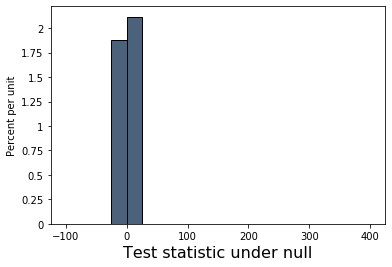

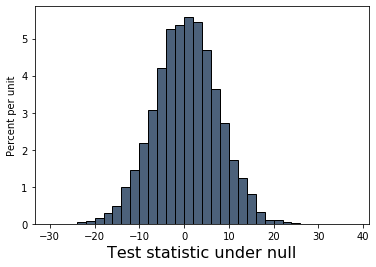

In [9]:

###Question 2.5.### 
    #Given these null and alternative hypotheses, deﬁne a good test statistic.
    
#Null Hypothesis: State murder rates increase and decrease over two-year periods as if "increase" or "decrease" were 
                    #sampled at random from a uniform distribution, like a fair coin flip.
#Alternative Hypothesis: State murder rates are more likely to increase over two-year periods.
#Test Statistics : no.of increases minus no.of decreases

###Question 2.6.### 

from datascience import *
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
print(uniform.sample_from_distribution('Chance', 100))

def simulate_under_null(num_chances_to_change):
    return uniform.sample_from_distribution('Chance',100).column(2).item(0) - uniform.sample_from_distribution('Chance',100).column(2).item(1)
    #print('test',uniform.sample_from_distribution('Chance', 100).column(2).item(0)-uniform.sample_from_distribution('Chance', 100).column(2).item(1))
#print('simulate_under_null',simulate_under_null)
#print('num_changes',num_changes)
uniform_samples = make_array()
for i in np.arange(5000):
    uniform_samples = np.append(uniform_samples, simulate_under_null(num_changes))
#print('uniform_samples',uniform_samples)
Table().with_column('Test statistic under null', uniform_samples).hist(0, bins=np.arange(-100, 400+25, 25))
Table().with_column('Test statistic under null', uniform_samples).hist(bins=np.arange(-30, 38+2, 2))
print("            Distribution of your test statistic")

#def simulate_under_null(data):
#    sub_data = data[['State','Year','Murder Rate']]
#    sub_data['diff'] = sub_data[['Murder Rate']].diff(2)
#    change = np.count_nonzero(sub_data['diff']>0)-np.count_nonzero(sub_data['diff']<0)
#    return 1 if change>0 else -1
#stat = []

#for i in range(1000):
#    stat.append(simulate_under_null(data.sample(num_changes)))
#pd.Series(stat).plot(kind='hist',bins=np.arange(-100, 100, 20))
#print("            Distribution of your test statistic")


In [10]:
#def simulate_under_null_(data):
#    sub_data = data[['State','Year','Murder Rate']]
#    sub_data['diff'] = sub_data[['Murder Rate']].diff(2)
#    print(sub_data)
#
#    change = np.count_nonzero(sub_data['diff']>0)-np.count_nonzero(sub_data['diff']<0)
#    return change
#
#stat = []
#for i in range(1000):
#    stat.append(simulate_under_null_(data.sample(num_changes)))
#pd.Series(stat).plot(kind='hist')
#print("            Distribution of your test statistic")

In [11]:
### Question 2.7 - explained in report### 

#which_side = "Right"
#stat = np.array(stat)
#if np.count_nonzero(stat>0)-np.count_nonzero(stat<0)>0:
#    reject_null = True
#else:
#    reject_null = False
#reject_null

In [12]:
### Question 3.1, 3.2 - mentioned in report### 

### Question 3.3###

states = set(data['State'])
non_death_penalty_states = set(['Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota'])
penalty_states = states - non_death_penalty_states

death_penalty_murder_rates = data[data['State'].isin(penalty_states)][['State','Year','Population','Murder Rate']]

print(death_penalty_murder_rates)

        State  Year  Population  Murder Rate
44    Alabama  1960     3266740         12.4
45    Alabama  1961     3302000         12.9
46    Alabama  1962     3358000          9.4
47    Alabama  1963     3347000         10.2
48    Alabama  1964     3407000          9.3
...       ...   ...         ...          ...
2195  Wyoming  1999      480000          2.3
2196  Wyoming  2000      493782          2.4
2197  Wyoming  2001      494423          1.8
2198  Wyoming  2002      498830          3.0
2199  Wyoming  2003      501242          2.8

[1936 rows x 4 columns]


In [13]:
### Question 3.4###

sub_data = death_penalty_murder_rates[np.logical_and(death_penalty_murder_rates['Year']>1970,death_penalty_murder_rates['Year']<1974)].sort_values(['State','Year'])
sub_data = sub_data.sort_values(['State','Year'])
stat = []
for i in penalty_states:
    df = sub_data[sub_data['State']==i]['Murder Rate']
    stat.append(df.diff(2).values[-1])

stat = np.array(stat)
test_stat_72 = np.count_nonzero(stat>0)- np.count_nonzero(stat<0)
print('Test statistic from 1971 to 1973:', test_stat_72)

Test statistic from 1971 to 1973: 22


            Distribution of your test statistic


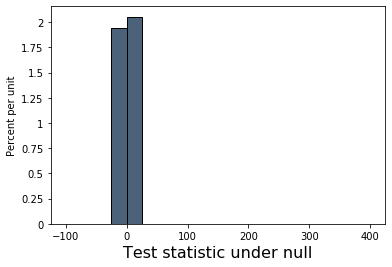

In [14]:
### Question 3.5###

samples = make_array()
for i in np.arange(5000):
    samples=np.append(samples,simulate_under_null(len(states)))
Table().with_column('Test statistic under null', samples).hist(0,bins=np.arange(-100, 400+25, 25))
print("            Distribution of your test statistic")

            Distribution of your test statistic


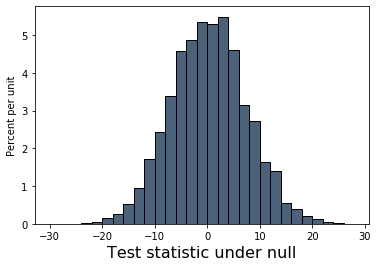

In [15]:
### Question 3.5###
Table().with_column('Test statistic under null', samples).hist(bins=np.arange(-30, 28+2, 2))
print("            Distribution of your test statistic")



In [16]:
###Question 3.6###

#pval=np.count_nonzero(np.array(stat)>=test_stat_72)/10000
pval=np.count_nonzero(samples>=test_stat_72)/10000
print("P-value:",pval)

P-value: 0.0005


In [17]:
###Section 4####

murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    return state not in non_death_penalty_states
    print('ndps',state not in non_death_penalty_states)
states = murder_rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
#print('states',states) 
#print('death_penalty',death_penalty) 
dpstates=death_penalty.where('Death Penalty',True).column(0)
#print('dp_states',dpstates)

num_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows
#print('no.of death penalty states',num_death_penalty_states)
death_penalty_murder_rates=murder_rates.where('State',are.contained_in(dpstates))
#print(death_penalty_murder_rates)
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]
diff_n(make_array(1, 10, 100, 1000, 10000), 2)

array([  99,  990, 9900], dtype=int64)

In [18]:
###Question 4.1###
    #Implement run_test, which takes the following arguments:
    #A table of murder rates for certain states, sorted by state and year like murder_rates, and
    #the year when the analysis starts. (The comparison group is two years later.)

def run_test(rates, start_year):
    end_year = start_year + 2
    year = rates.where('Year',are.between(start_year,end_year+1))
    dfstats=make_array()
    dist_state = rates.sort('State',distinct = True).column('State')
    #print('distinct states',dist_state)
    for i in np.arange(len(dist_state)):
        df=diff_n(year.where('State',dist_state[i]).column(3),2)
        dfstats=np.append(dfstats,df)
        #print('stats',dfstats)
    observed_test_statistic= np.count_nonzero(dfstats>0)-np.count_nonzero(dfstats<0)
    print('Test statistic', start_year, 'to', end_year, ':', observed_test_statistic)
    num_states = rates.group('State').num_rows
    samples = make_array()
    for i in np.arange(5000): 
        samples=np.append(samples,simulate_under_null(len(dist_state)))
    if observed_test_statistic<0:
        pval=np.count_nonzero(samples<observed_test_statistic)/5000
        #return pval
        print("P-value:",pval)
    elif observed_test_statistic>0:
        pval=np.count_nonzero(samples>observed_test_statistic)/5000
        #return pval
        print("P-value:",pval)
print(run_test(death_penalty_murder_rates, 1971))



Test statistic 1971 to 1973 : 22
P-value: 0.0006
None


In [19]:
###Question 4.2.### 
    # Create a table called non_death_penalty_murder_rates with the same columns as murder_rates but only containing 
    #rows for the six states without the death penalty in 1971. Perform the same test on this table
    
non_death_penalty_murder_rates=murder_rates.where('State',are.contained_in(non_death_penalty_states))
run_test(non_death_penalty_murder_rates, 1971)

Test statistic 1971 to 1973 : 1
P-value: 0.4316


In [20]:
ak = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
mn = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')
def two_year_changes(rates):
    return np.count_nonzero(diff_n(rates,2)>0)-np.count_nonzero(diff_n(rates,2)<0)
    
print("Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states:",
      sum(death_penalty_murder_rates.where('Year', are.between_or_equal_to(1975, 1977))
                                    .group('State', two_year_changes)
                                    .column("Murder Rate two_year_changes")))
run_test(death_penalty_murder_rates, 1975)

###Question 4.3.### 
    #Now we've analyzed states where the death penalty went away and came back, as well as states where the death 
    #penalty was outlawed all along. What do you conclude from the results of the tests we have conducted so far? 
    #Does all the evidence consistently point toward one conclusion, or is there a contradiction?
    
#mentioned in the report

Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states: -18
Test statistic 1975 to 1977 : -18
P-value: 0.0058


In [21]:
###Question 5.1.### 
    #Create a table called average_murder_rates with 1 row for each year in murder_rates. It should have 3 columns:
    #Year, the year,
    #Death penalty states, the average murder rate of the states that had the death penalty in 1971, and
    #No death penalty states, the average murder rate of the other states.
    
states = set(data['State'])
non_death_penalty_states = set(['Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota'])
penalty_states = states - non_death_penalty_states
p_data   = data[data['State'].isin(penalty_states)][['State','Year','Murder Rate']].groupby('Year').agg('mean').reset_index().rename(columns={'Murder Rate':'Death penalty states'})
non_data = data[data['State'].isin(non_death_penalty_states)][['State','Year','Murder Rate']].groupby('Year').agg('mean').reset_index().rename(columns={'Murder Rate':'No death penalty states'})
average_murder_rates = p_data.merge(non_data,on='Year')
average_murder_rates.head()

,Year,Death penalty states,No death penalty states
0,1960,5.279545,3.550000
1,1961,4.777273,3.683333
2,1962,4.615909,2.333333
3,1963,4.613636,2.750000
4,1964,4.711364,3.400000


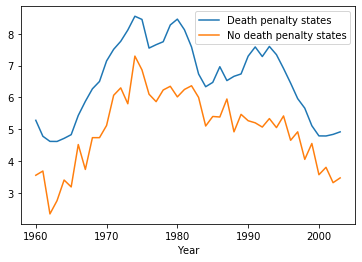

In [22]:
###Question 5.2.###
    #create plot
    #one short sentence a high-level takeaway from the line plot below. 
    #Are the murder rates in these two groups of states related?
    
average_murder_rates.plot('Year')

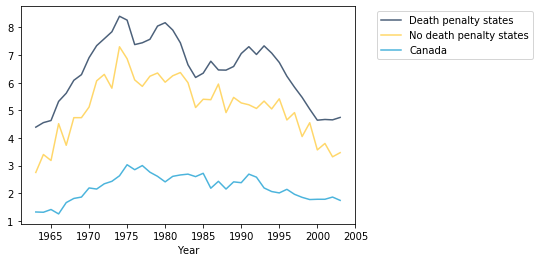

In [23]:
dps=murder_rates.where('State',are.contained_in(states)).group('Year',np.mean).column(3)
ndps=murder_rates.where('State',are.contained_in(non_death_penalty_states)).group('Year',np.mean).column(3)
dis_year=murder_rates.sort('Year',distinct=True).column('Year')
average_murder_rates = Table().with_columns('Year',dis_year,'Death penalty states',dps,'No death penalty states',ndps)

###Question 5.2.###
    #create plot
    #one short sentence a high-level takeaway from the line plot below. 
    #Are the murder rates in these two groups of states related?

canada = Table.read_table('canada.csv')
murder_rates_with_canada = average_murder_rates.join("Year", canada.select("Year", "Homicide").relabeled("Homicide", "Canada"))
murder_rates_with_canada.plot('Year')